<a href="https://colab.research.google.com/github/lek-bon/data_analysis/blob/main/Gazprom_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

stock_name = 'Gas'
# from google.colab import files 
from google.colab import drive 
drive.mount('/content/drive')
S_eon=pd.read_excel('/content/drive/My Drive/Colab Notebooks/TTF_2.xlsx')
filePath = os.path.expanduser('/content/drive/My Drive/Colab Notebooks/TTF_2.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


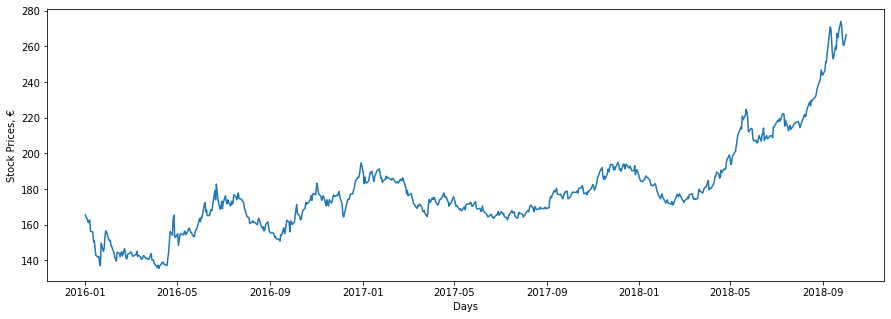

266.552
[-0.01695979899497483, -0.009584664536741228, 0.006451612903225756, 0.0019230769230769958, -0.038387715930902164, -0.0019960079840320114, -0.03666666666666666, 0.004844290657439504, -0.02548209366391193, -0.02968197879858654, -0.005826656955571696, 0.0021978021978020807, -0.029970760233918002, -0.006782215523737805, 0.09256449165402136, -0.03125000000000023, 0.012903225806451908, 0.04246284501061557, 0.02172437202987103, -0.0013289036544850395, -0.02860944777112447, -0.005479452054794478, 0.002066115702479417, -0.01924398625429576, -0.004905395935528949, -0.02464788732394376, -0.015884476534295908, -0.008070432868672085, -0.00665680473372786, 0.03499627699180942, -0.0035971223021583443, -0.01444043321299628, 0.01465201465201454, 0.005776173285198709, -0.01651112706389105, 0.02919708029197098, -0.02127659574468088, -0.01666666666666664, -0.0014738393515106739, 0.018450184501844977, 0.0036231884057969744, 0.005776173285198709, -0.00215362526920324, -0.010791366906474836, -0.00509

In [5]:
start_date = '2016-01-01'
end_date = '2018-10-01'
pred_end_date = '2019-03-31'

plt.figure(figsize = (15, 5))
plt.plot(S_eon['Date'], S_eon['Price'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

# Parameter Assignments
So = S_eon.loc[S_eon.shape[0] - 1, "Price"]
print(So)
dt = 1 # day   # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
                 format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
                 end = pd.to_datetime(pred_end_date, 
                 format = "%Y-%m-%d")).to_series().map(lambda x: 
                 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
returns = (S_eon.loc[1:, 'Price'] - \
          S_eon.shift(1).loc[1:, 'Price']) / \
          S_eon.shift(1).loc[1:, 'Price']
print(returns.tolist())
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 1000 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

In [14]:
# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
print(drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

[0.00066776 0.00133552 0.00200328 0.00267104 0.0033388  0.00400655
 0.00467431 0.00534207 0.00600983 0.00667759 0.00734535 0.00801311
 0.00868087 0.00934863 0.01001639 0.01068415 0.01135191 0.01201966
 0.01268742 0.01335518 0.01402294 0.0146907  0.01535846 0.01602622
 0.01669398 0.01736174 0.0180295  0.01869726 0.01936502 0.02003277
 0.02070053 0.02136829 0.02203605 0.02270381 0.02337157 0.02403933
 0.02470709 0.02537485 0.02604261 0.02671037 0.02737812 0.02804588
 0.02871364 0.0293814  0.03004916 0.03071692 0.03138468 0.03205244
 0.0327202  0.03338796 0.03405572 0.03472348 0.03539123 0.03605899
 0.03672675 0.03739451 0.03806227 0.03873003 0.03939779 0.04006555
 0.04073331 0.04140107 0.04206883 0.04273659 0.04340434 0.0440721
 0.04473986 0.04540762 0.04607538 0.04674314 0.0474109  0.04807866
 0.04874642 0.04941418 0.05008194 0.05074969 0.05141745 0.05208521
 0.05275297 0.05342073 0.05408849 0.05475625 0.05542401 0.05609177
 0.05675953 0.05742729 0.05809505 0.0587628  0.05943056 0.06009

In [7]:
# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series
print(S) 

[[266.552      271.12660432 275.01803744 ... 339.82440489 343.98937189
  343.21139576]
 [266.552      270.08601866 264.81538598 ... 285.30182156 285.35524535
  289.32965856]
 [266.552      261.04374967 261.8929127  ... 246.72715168 246.9564232
  249.72588097]
 ...
 [266.552      266.34984314 271.64919898 ... 227.98596598 223.20272516
  219.49472808]
 [266.552      264.1562987  260.72608158 ... 223.65283345 231.88278553
  235.58120984]
 [266.552      266.32315066 265.88644305 ... 272.3720542  271.38832186
  267.74368355]]


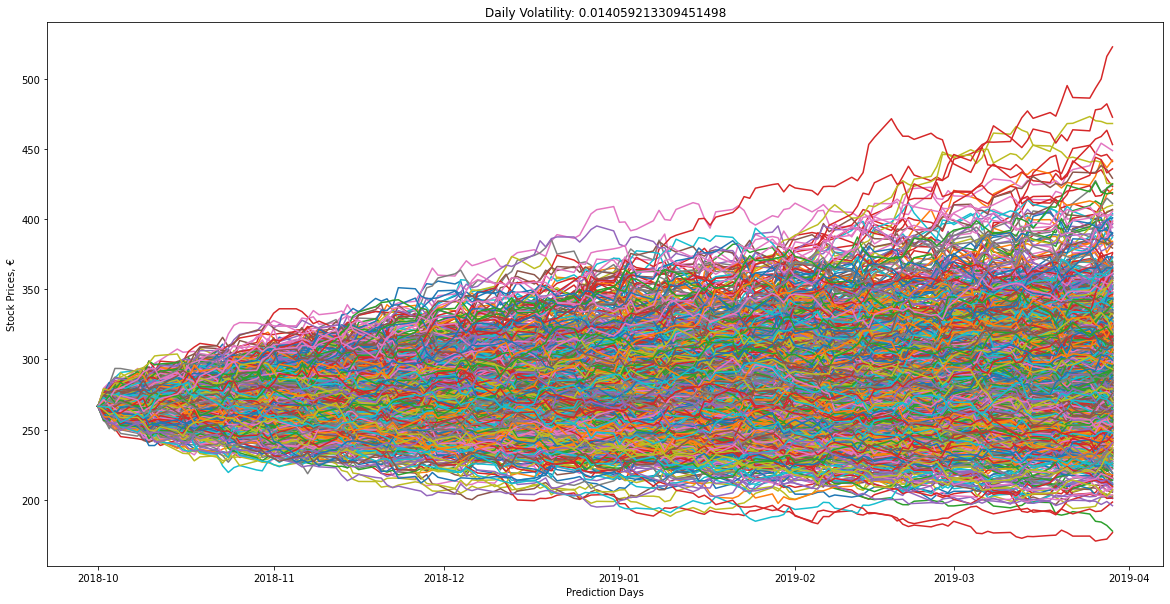

       index           0           1  ...         997         998         999
0 2018-10-01  266.552000  266.552000  ...  266.552000  266.552000  266.552000
1 2018-10-02  271.126604  270.086019  ...  266.349843  264.156299  266.323151
2 2018-10-03  275.018037  264.815386  ...  271.649199  260.726082  265.886443
3 2018-10-04  274.908219  267.292557  ...  268.044306  261.886866  261.048313
4 2018-10-05  267.407663  264.420782  ...  269.723398  258.428640  255.036513

[5 rows x 1001 columns]


In [8]:
# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = S_eon["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
plt.show()

# Dataframe format for predictions - first 1000 scenarios
Preds_df = pd.DataFrame(S.swapaxes(0, 1)[:, :1000]).set_index(
           pd.date_range(start = S_eon["Date"].max(), 
           end = pred_end_date, freq = 'D').map(lambda x:
           x if x.isoweekday() in range(1, 6) else np.nan).dropna()
           ).reset_index(drop = False)
        
print(Preds_df.head())        
Preds_df.to_excel("all.xlsx") 